In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('births.csv')

In [3]:
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [4]:
data.shape

(15547, 5)

In [5]:
data['day'].fillna(0, inplace = True)

In [6]:
data['day'] = data['day'].astype(int)

In [7]:
data

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,0,M,183219
15543,2008,11,0,F,158939
15544,2008,11,0,M,165468
15545,2008,12,0,F,173215


In [8]:
data['decade'] = 10*(data['year']//10)

In [9]:
data.sort_values(by = 'decade', ascending = True)

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
506,1969,8,30,F,4680,1960
507,1969,8,30,M,5028,1960
508,1969,8,31,F,4358,1960
509,1969,8,31,M,4628,1960
...,...,...,...,...,...,...
15406,2003,2,0,M,157384,2000
15407,2003,3,0,F,164318,2000
15408,2003,3,0,M,173100,2000
15397,2002,10,0,F,169482,2000


In [10]:
pivot_data = data.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

In [11]:
pivot_data

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


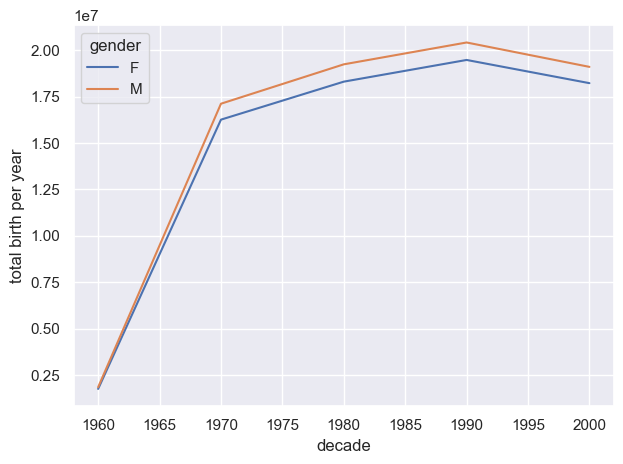

In [12]:
sns.set()

pivot_data.plot()

plt.ylabel('total birth per year')
plt.tight_layout()
plt.show()

In [13]:
quartiles = np.percentile(data['births'], [25, 50,75])

In [14]:
quartiles

array([4358. , 4814. , 5289.5])

In [15]:
sample_mean = quartiles[1]
sample_mean

4814.0

In [16]:
robust_sigma = 0.74*(quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [21]:
data = data.query('(births > @sample_mean - 5 * @robust_sigma) & (births < @sample_mean + 5 * @robust_sigma)')

In [22]:
data

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [23]:
data['day'] = data['day'].astype(int)

In [24]:
data

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [28]:
data.index = pd.to_datetime(10000*data.year +
                           100*data.month +
                           data.day, format = '%Y%m%d')

In [29]:
data.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [30]:
data['dayofweek'] = data.index.dayofweek

In [31]:
data

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


/var/folders/80/c2dd9hw15tngjj29zd7lswl40000gn/T/ipykernel_1099/2635416757.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


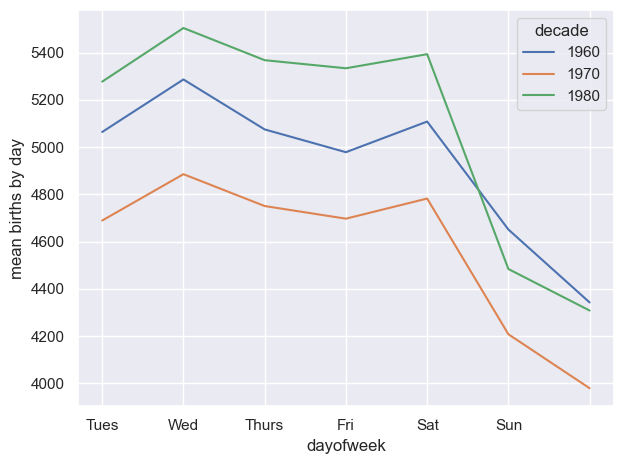

In [35]:
sns.set()
data.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.tight_layout()
plt.show()

In [37]:
births_month = data.pivot_table('births', [data.index.month, data.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/var/folders/80/c2dd9hw15tngjj29zd7lswl40000gn/T/ipykernel_1099/3331547714.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


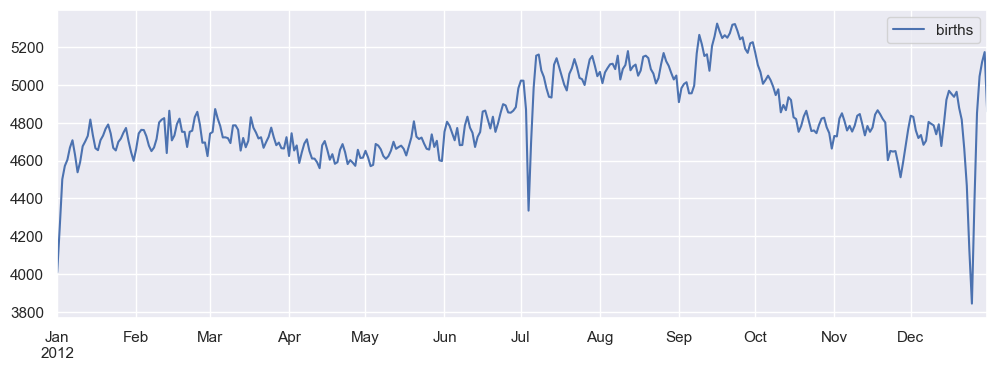

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()